In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [26]:
df=pd.read_csv('/content/diabetes.csv')

In [27]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [29]:
df.dropna(inplace=True)

In [30]:
invalid=['Glucose','SkinThickness','Insulin','BMI']
df[invalid]=df[invalid].replace(0,np.nan)

In [39]:
df.fillna(df.median(), inplace=True)


<ipython-input-40-27066a2dcb4c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='outcome', data=df, palette="Set2")


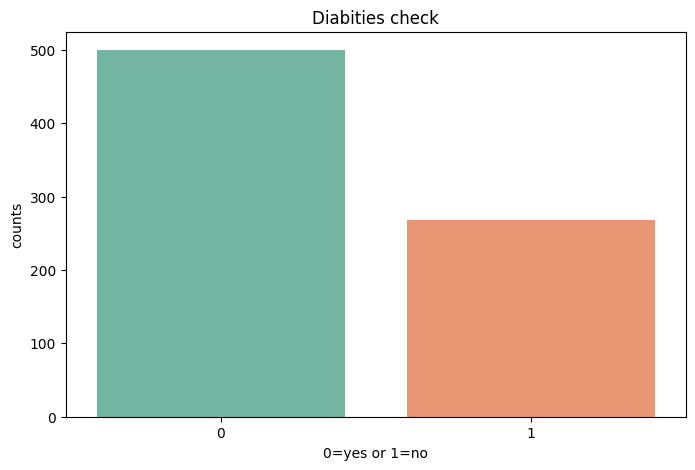

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(x='outcome', data=df, palette="Set2")

plt.title("Diabities check")
plt.xlabel("0=yes or 1=no")
plt.ylabel('counts')
plt.show()

<ipython-input-41-e2cec8354e49>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='outcome',y='Glucose', data=df, palette="Set2")


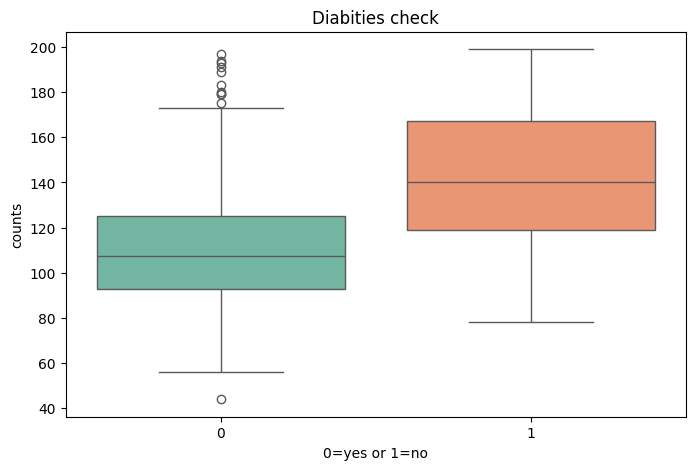

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(x='outcome',y='Glucose', data=df, palette="Set2")

plt.title("Diabities check")
plt.xlabel("0=yes or 1=no")
plt.ylabel('counts')
plt.show()

In [42]:
x=df.drop("outcome",axis=1)
y=df["outcome"]

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [44]:
scaler= StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [45]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [46]:
y_pred=model.predict(x_test)

In [48]:
print("Confusion matrix:",confusion_matrix(y_test,y_pred))

Confusion matrix: [[80 19]
 [18 37]]


In [52]:
print(f" Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")


 Accuracy Score: 0.76


In [51]:
print("classification:",classification_report(y_test,y_pred))

classification:               precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



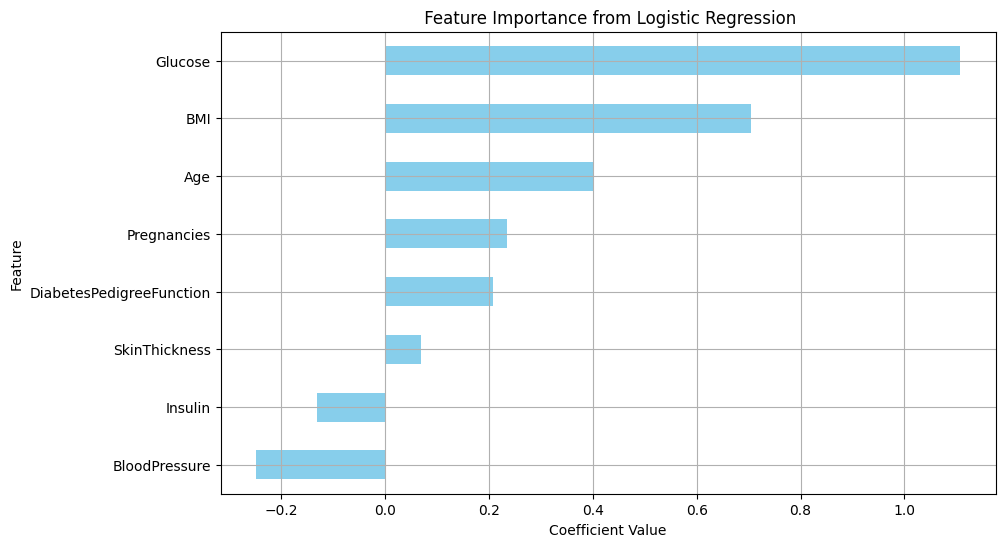

In [54]:
coefficients = pd.Series(model.coef_[0], index=x.columns)
plt.figure(figsize=(10, 6))
coefficients.sort_values().plot(kind='barh', color='skyblue')
plt.title(" Feature Importance from Logistic Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(True)
plt.show()